# 01 - Plot Bomb Cyclone on 2021-10-26

In [51]:
# import a few libraries and functions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xarray as xr
import pandas as pd

from qartod_testing.local_qc_test import load_gross_range_qartod_test_values, load_climatology_qartod_test_values
from ooi_data_explorations.common import load_kdata, load_gc_thredds, m2m_request, m2m_collect

In [2]:
# load data from OOI gold copy thredds server
refdes = 'CP01CNSM-SBD11-06-METBKA000'
site, node, sensor = refdes.split('-',2)
method = 'recovered_host'
stream = 'metbk_hourly'
metbk = load_gc_thredds(site, node, sensor, method, stream, tag=".*METBK.*\.nc$")

In [3]:
metbk

<xarray.Dataset>
Dimensions:                              (time: 3365251)
Coordinates:
  * time                                 (time) datetime64[ns] 2015-05-07T17:...
Data variables: (12/72)
    shortwave_irradiance_qc_results      (time) float32 29.0 29.0 ... 29.0 nan
    air_temperature                      (time) float64 13.74 13.74 ... 20.32
    barometric_pressure                  (time) float64 1.023e+03 ... 1.021e+03
    air_temperature_qc_results           (time) float32 29.0 29.0 ... 29.0 nan
    precipitation_qc_results             (time) float32 13.0 13.0 ... 13.0 nan
    precipitation                        (time) float64 17.65 17.69 ... 24.01
    ...                                   ...
    met_frshflx_qc_executed              (time) float32 nan nan nan ... nan 16.0
    met_rainrte_qc_executed              (time) float32 nan nan nan ... nan 29.0
    met_buoyflx_qc_executed              (time) float32 nan nan nan ... nan 16.0
    met_heatflx                          (time) float64 nan nan ... nan 24.91
    met_frshflx                          (time) float64 nan nan ... nan 0.02838
    met_sphum2m_qc_results               (time) float32 nan nan nan ... nan 13.0
Attributes: (12/69)
    node:                               SBD11
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_host
    stream:                             metbk_a_dcl_instrument_recovered
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                40.14022
    lon:                                -70.77128

In [6]:
# load data from kdata server for METBK deployment that shows cyclone most clearly
refdes = 'CP01CNSM-SBD11-06-METBKA000'
site, node, sensor = refdes.split('-',2)
method = 'recovered_host'
stream = 'metbk_hourly'
deploy = 14
metbk = load_kdata(site, node, sensor, method, stream, tag=('*deployment%04d*.nc' % deploy))

Loading and Processing Data Files: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


In [8]:
# check what's in here
metbk

# relevant variables include barometric_pressure, barometric_pressure_qc_executed, and barometric_pressure_qc_results

<xarray.Dataset>
Dimensions:                              (time: 337570)
Coordinates:
  * time                                 (time) datetime64[ns] 2021-03-31T15:...
Data variables: (12/72)
    deployment                           (time) int32 14 14 14 14 ... 14 14 14
    northward_velocity                   (time) float64 nan nan ... nan -0.05288
    eastward_velocity                    (time) float64 nan nan ... nan -0.1185
    shortwave_irradiance_qc_results      (time) float32 21.0 21.0 ... 29.0 nan
    air_temperature                      (time) float64 12.37 12.37 ... 11.37
    barometric_pressure                  (time) float64 1.023e+03 ... 1.022e+03
    ...                                   ...
    met_frshflx_qc_executed              (time) float32 nan nan nan ... nan 16.0
    met_rainrte_qc_executed              (time) float32 nan nan nan ... nan 29.0
    met_buoyflx_qc_executed              (time) float32 nan nan nan ... nan 16.0
    met_heatflx                          (time) float64 nan nan ... nan -190.5
    met_frshflx                          (time) float64 nan nan ... nan 0.2342
    met_sphum2m_qc_results               (time) float32 nan nan nan ... nan 13.0
Attributes: (12/69)
    node:                               RID26
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_host
    stream:                             velpt_ab_dcl_instrument_recovered
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                40.132833
    lon:                                -70.778

In [9]:
# grab just barometric pressure for now, and check that I did it right
atm_pressure = metbk['barometric_pressure']
atm_pressure

<xarray.DataArray 'barometric_pressure' (time: 337570)>
array([1023.28997803, 1023.35998535, 1023.15002441, ..., 1022.17999268,
       1022.04998779, 1022.04998779])
Coordinates:
  * time     (time) datetime64[ns] 2021-03-31T15:36:02.312000512 ... 2021-11-...
Attributes:
    _FillValue:               -9999999.0
    comment:                  Barometric Pressure is a measure of the weight ...
    long_name:                Barometric Pressure
    precision:                2
    coordinates:              time lat lon
    data_product_identifier:  BARPRES_L0
    units:                    mbar

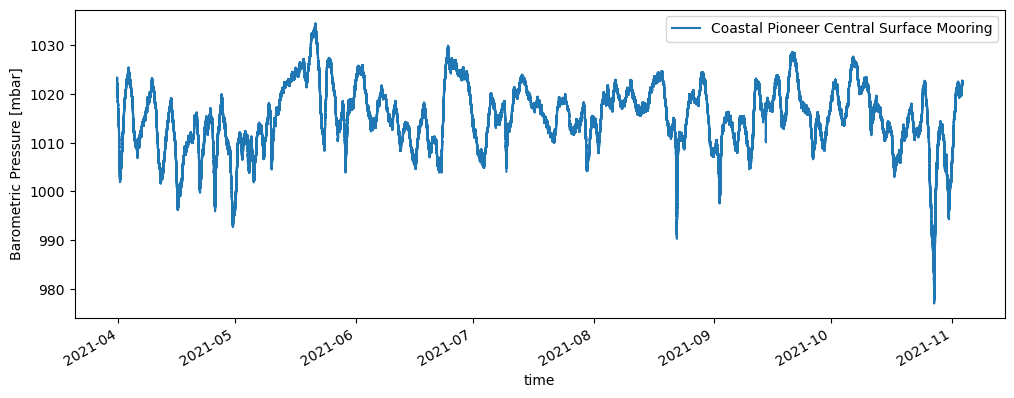

In [10]:
# plot full deployment of barometric pressure
atm_pressure.plot(figsize=(12,4), label='Coastal Pioneer Central Surface Mooring')
plt.legend()

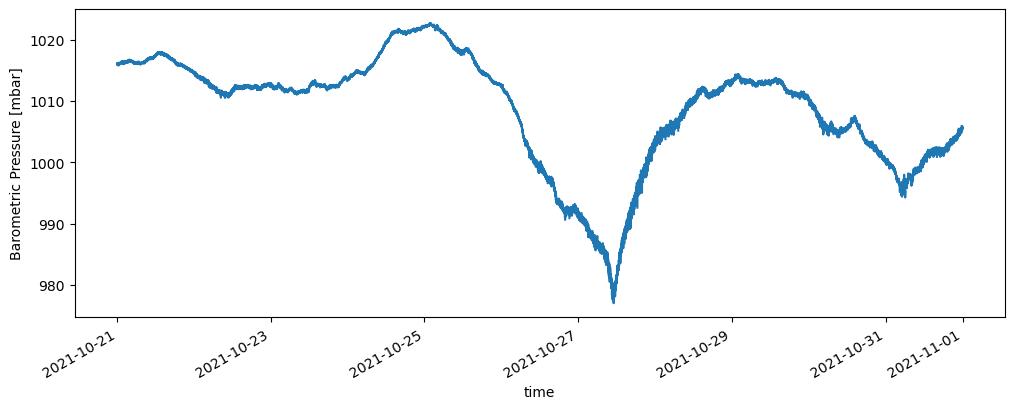

In [11]:
# plot barometric pressure during event on 2021-10-26 +-5 days
atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(12,4))

In [12]:
# import gross range qartod test lookup table
grlim = load_gross_range_qartod_test_values(refdes, stream, 'barometric_pressure')
grlim

,subsite,node,sensor,stream,parameters,qcConfig,source,notes


In [16]:
# import climatology qartod test lookup table
clim, zinp = load_climatology_qartod_test_values(refdes, 'metbk_a_dcl_instrument_recovered', 'barometric_pressure')
clim

,"[1, 1]","[2, 2]","[3, 3]","[4, 4]","[5, 5]","[6, 6]","[7, 7]","[8, 8]","[9, 9]","[10, 10]","[11, 11]","[12, 12]"
"[0, 0]","[984.231, 1048.8239]","[985.6537, 1046.5735]","[986.7057, 1044.974]","[988.7984, 1042.0441]","[992.8742, 1036.8035]","[998.7187, 1030.233]","[1001.205, 1028.3706]","[1002.8057, 1028.8386]","[998.4263, 1035.723]","[994.7398, 1040.9632]","[991.0711, 1044.5556]","[989.6853, 1044.7099]"


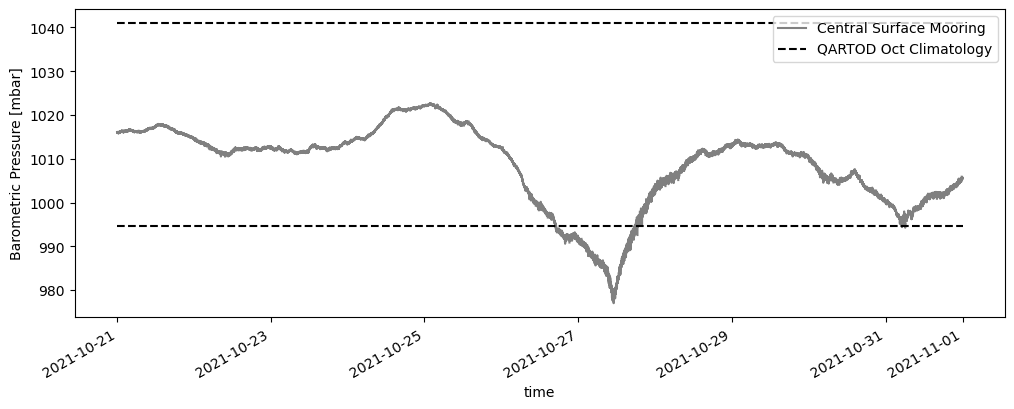

In [17]:
# plot barometric pressure during event with monthly climatology lines
atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(12,4), label='Central Surface Mooring', color='gray')
plt.hlines(clim['[10, 10]']['[0, 0]'], pd.to_datetime('2021-10-21'), pd.to_datetime('2021-11-01'), colors='black', linestyles='dashed', label='QARTOD Oct Climatology')
plt.legend()

Now that we've loaded the test values into the workspace, we can call any of the tuples of test range values with a command of the form `df['column_label']['row_label']`.

In [18]:
# Get subset of data that would be flagged as suspect by QARTOD flags
suspect_pressure = atm_pressure.where(atm_pressure.sel(time=slice('2021-10-21','2021-10-31'))<=clim['[10, 10]']['[0, 0]'][0])
suspect_pressure

<xarray.DataArray 'barometric_pressure' (time: 17165)>
array([nan, nan, nan, ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 2021-10-21 ... 2021-10-31T23:59:59.798999552
Attributes:
    _FillValue:               -9999999.0
    comment:                  Barometric Pressure is a measure of the weight ...
    long_name:                Barometric Pressure
    precision:                2
    coordinates:              time lat lon
    data_product_identifier:  BARPRES_L0
    units:                    mbar

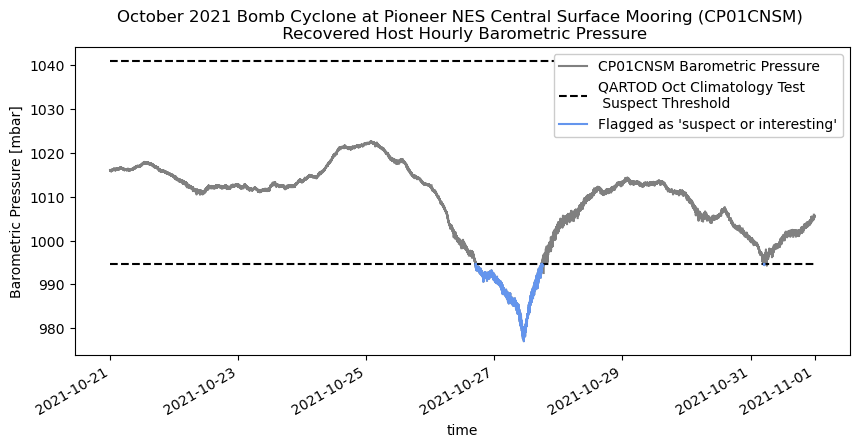

In [19]:
# plot this subset over the plot above showing the barometric pressure time series around this event
atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(10,4), label='CP01CNSM Barometric Pressure', color='gray')
# atm_pressure.sel(time=slice('2021-10-21','2021-10-31')).plot(figsize=(10,4), color='gray')
plt.hlines(clim['[10, 10]']['[0, 0]'], pd.to_datetime('2021-10-21'), pd.to_datetime('2021-11-01'), colors='black', linestyles='dashed', label='QARTOD Oct Climatology Test \n Suspect Threshold')
suspect_pressure.plot(color='cornflowerblue', label="Flagged as 'suspect or interesting'")
plt.legend(framealpha=1)
plt.title('October 2021 Bomb Cyclone at Pioneer NES Central Surface Mooring (CP01CNSM) \n Recovered Host Hourly Barometric Pressure')
plt.savefig('../data/processed/10_2021-Bomb_Cyclone_Pressure-OOI_Pioneer_NES.png', bbox_inches='tight')

Are there gross range limits for the QARTOD test available that I should be showing so that people can't say this data is "bad/fail"?

## Recreate figure with QARTOD flags

Previously, the METBK QARTOD test was not in production yet, so the figure above was created with the publicly available threshold limits on GitHub. Next, we use the QARTOD flags from the tests recently pushed to production to recreate the above figure.

In [ ]:
# Import data from OOINet THREDDS server
# The QARTOD flags haven't been added to datasets in the gold copy or kdata servers yet
refdes = 'CP01CNSM-SBD11-06-METBKA000'
site, node, sensor = refdes.split('-',2)
method = 'recovered_host'
stream = 'metbk_hourly'
deploy = 14

In [31]:
# Make asynchronous M2M request
data = m2m_request(site, node, sensor, method, stream)

Requesting:
	refdes: CP01CNSM-SBD11-06-METBKA000
	method: recovered_host
	stream: metbk_hourly
	from None to None
Waiting for OOINet to process and prepare data request, this may take up to 20 minutes.
Waiting: 100%|██████████| 400/400 [20:04<00:00,  3.01s/it]


In [33]:
# Do not rerun this cell, only reuse dict as printed below
# data

{'requestUUID': '09c1d90d-ef26-40ea-8b62-0d6df064101b',
 'outputURL': 'https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/kylene.cooley@whoi.edu/20240122T200336166Z-CP01CNSM-SBD11-06-METBKA000-recovered_host-metbk_hourly/catalog.html',
 'allURLs': ['https://opendap-west.oceanobservatories.org/thredds/catalog/ooi/kylene.cooley@whoi.edu/20240122T200336166Z-CP01CNSM-SBD11-06-METBKA000-recovered_host-metbk_hourly/catalog.html',
  'https://downloads-west.oceanobservatories.org/async_results/kylene.cooley@whoi.edu/20240122T200336166Z-CP01CNSM-SBD11-06-METBKA000-recovered_host-metbk_hourly'],
 'sizeCalculation': 3316076000,
 'timeCalculation': 696,
 'numberOfSubJobs': 1373}

In [35]:
# Download data via M2M API
metbk_m2m = m2m_collect(data, tag=('.*deployment%04d.*\.nc$' % deploy))

In [36]:
# Check for _qartod_executed and _qartod_results variables
metbk_m2m

<xarray.Dataset>
Dimensions:                                  (time: 337570)
Coordinates:
  * time                                     (time) datetime64[ns] 2021-03-31...
Data variables: (12/86)
    met_tempskn_qc_results                   (time) float32 nan nan ... nan 13.0
    met_latnflx                              (time) float64 nan nan ... 187.5
    met_latnflx_qc_executed                  (time) float32 nan nan ... nan 16.0
    met_rainflx                              (time) float64 nan nan ... 0.624
    met_netlirr_qc_executed                  (time) float32 nan nan ... nan 29.0
    barometric_pressure                      (time) float64 1.023e+03 ... 1.0...
    ...                                       ...
    sea_surface_temperature_qartod_results   (time) float32 1.0 1.0 ... 1.0 nan
    precipitation_qc_executed                (time) float32 29.0 29.0 ... nan
    met_relwind_speed_qc_results             (time) float32 29.0 29.0 ... nan
    relative_humidity_qartod_executed        (time) object '11' '11' ... nan
    air_temperature_qartod_executed          (time) object '11' '11' ... nan
    shortwave_irradiance_qc_executed         (time) float32 29.0 29.0 ... nan
Attributes: (12/69)
    node:                               SBD11
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_host
    stream:                             metbk_hourly
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                40.132833
    lon:                                -70.778

In [42]:
# Make barometric pressure and QARTOD results flag variables for 
# the same time period as the abstract figure
atm_pres = metbk_m2m["barometric_pressure"].sel(time=slice('2021-10-21','2021-10-31'))
atm_pres_flag = metbk_m2m["barometric_pressure_qartod_results"].sel(time=slice('2021-10-21','2021-10-31'))

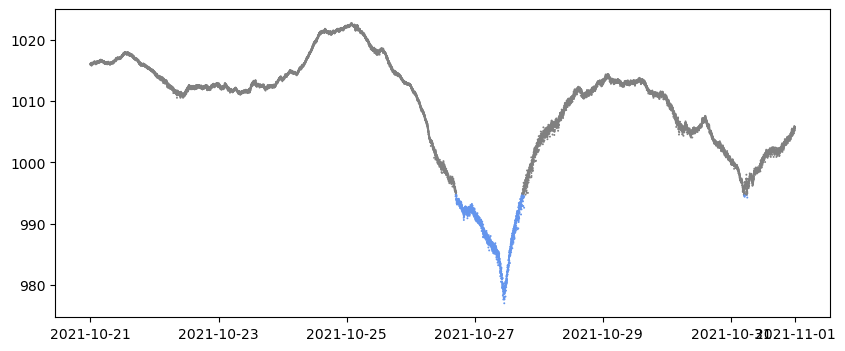

In [55]:
# Create a scatter plot of barometric pressure with color from the flag value
plt.figure(figsize=(10,4))
plt.scatter(atm_pres['time'], atm_pres.values, s=2, edgecolors='none',
            c=atm_pres_flag.values, cmap=ListedColormap(['gray', 'cornflowerblue']))

In [56]:
# Write asynchronous data request dict to a text file
with open(f"../data/external/{refdes}_{method}_{stream}_asyncm2m.txt", 'w') as text_file:
    text_file.write(str(data))